<a href="https://colab.research.google.com/github/Adolphsus/CC3001/blob/main/Ejercicio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aed-utilities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=8c8e773155460d576e1bc72de824f4a30f4e26f5925ae85f9b31f15b3f9d0949
  Stored in directory: /root/.cache/pip/wheels/db/6d/39/cc766f956b1e504722228ad30c8154cd48f4470e7e24dcfd0e
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=96891b6010c5b5c454727012e5ce7ef0dca28c34a24d54ad2f813317d9a5130b
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built aed-utilities validators


### Ejercicio 6 - Adolfo Arenas P.

Suponga que los campos ``info`` de los nodos externos de un árbol contienen solo números y escriba una función que pueda invocarse como ``formula.evaluar()``, que al ser ejecutada entregue el valor numérico  de la fórmula representada por el árbol. Modifique a continuación la definición de las clases ``Arbol``, ``Nodoi`` y ``Nodoe`` para que incluyan la nueva función ``evaluar()``. Note que tiene que implementar la función ``evaluar()`` en las tres clases.

In [ ]:
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def evaluar(self):
      if self.izq.info == None and self.der.info == None: #si para un nodo interno se cumple que ambos hijos son None
        return int(self.info.info)                        #entonces retornamos el int de dicho nodo, pues es en realidad
      var1 = self.izq.evaluar()                           #un nodo externo.
      var2 = self.der.evaluar()
      if self.info == "+":                                #ahora segun el operando, se suman, restan, elevan, multiplican
        return var1 + var2                                #o dividen las variables (info de los hijos del nodo).
      elif self.info == "-":
        return var1 - var2
      elif self.info == "^":
        return var1 ** var2
      elif self.info == "*":
        return var1 * var2
      elif self.info == "/":                              ####notese que la "calculadora" es solo de enteros####
        return var1 // var2
      return self.info.info

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def evaluar(self):
        ops = "+-^*/"                #la idea aqui es verificar si la info del nodo es o no un operador, de no serlo retorno la info
        if self.info != ops:         #que contiene el nodo
          return self.info

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")   #puse esta funcion del apunte para facilitar el calculo
    def evaluar(self):
        print("Resultado:", end=" ") #mostramos el resultado
        return self.raiz.evaluar()   #devolvemos el resultado del calculo del arbol

Pruébela a continuación:

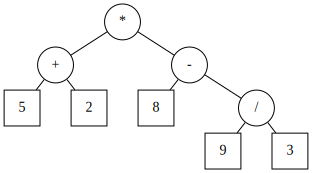

Resultado: 

35

In [ ]:
formula= Arbol(
            Nodoi(
                Nodoi(Nodoe(5),"+",Nodoe(2)),
                "*",
                Nodoi(
                    Nodoe(8),
                    "-",
                    Nodoi(Nodoe(9),"/",Nodoe(3))
                )
            )
        )
formula.dibujar()
formula.evaluar()